# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization
import pandas as pd 
from fbprophet import Prophet
import plotly.express as px 

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv('TSLA.csv')

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800
1,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600
2,2020-09-11,381.940002,382.500000,360.500000,372.720001,372.720001,60717500
3,2020-09-14,380.950012,420.000000,373.299988,419.619995,419.619995,83020600
4,2020-09-15,436.559998,461.940002,430.700012,449.760010,449.760010,97298200
...,...,...,...,...,...,...,...
248,2021-09-02,734.500000,740.969971,730.539978,732.390015,732.390015,12777300
249,2021-09-03,732.250000,734.000000,724.200012,733.570007,733.570007,15246100
250,2021-09-07,740.000000,760.200012,739.260010,752.919983,752.919983,20039800
251,2021-09-08,761.580017,764.450012,740.770020,753.869995,753.869995,18757400


In [ ]:
df.info() #shows our data in more detail

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
df.describe() #finanacial analysis and gives stats info

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,632.852412,645.818458,618.516523,633.063379,633.063379,3.543420e+07
std,128.890382,130.185304,127.263057,128.771343,128.771343,2.168267e+07
min,356.600006,369.000000,341.510010,366.279999,366.279999,9.800600e+06
25%,581.159973,597.849976,563.380005,577.869995,577.869995,2.190190e+07
50%,658.390015,668.200012,641.109985,655.900024,655.900024,3.028420e+07
75%,710.169983,719.000000,698.000000,709.669983,709.669983,4.209580e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
#using area graph to analyze prices
px.area(df, x='Date', y='Close')

In [ ]:
#gives the total transactional volume of tesla
px.area(df, x='Date', y='Volume')
#Decmeber 18, 2020 S&P500, tesla introduced thus volume was so high 

In [ ]:
px.box(df, y='Close') #stats about the close price 

# Understanding Facebook Prophet

In [ ]:
#FbProphet helps understanding and detecting trends and seasonal influences. ML kind algorithm
#Works great with missing data, sofisticated preprocessing is not required 
# You only need 2 columns date and price 

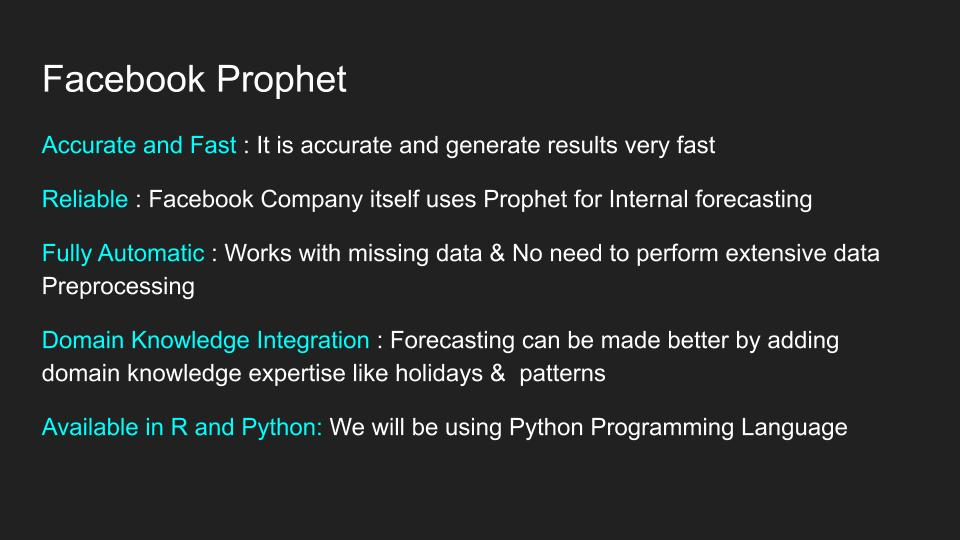

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800
1,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600
2,2020-09-11,381.940002,382.500000,360.500000,372.720001,372.720001,60717500
3,2020-09-14,380.950012,420.000000,373.299988,419.619995,419.619995,83020600
4,2020-09-15,436.559998,461.940002,430.700012,449.760010,449.760010,97298200
...,...,...,...,...,...,...,...
248,2021-09-02,734.500000,740.969971,730.539978,732.390015,732.390015,12777300
249,2021-09-03,732.250000,734.000000,724.200012,733.570007,733.570007,15246100
250,2021-09-07,740.000000,760.200012,739.260010,752.919983,752.919983,20039800
251,2021-09-08,761.580017,764.450012,740.770020,753.869995,753.869995,18757400


In [ ]:
column=['Date','Close']
newDF = pd.DataFrame(df, columns=column)
newDF

,Date,Close
0,2020-09-09,366.279999
1,2020-09-10,371.339996
2,2020-09-11,372.720001
3,2020-09-14,419.619995
4,2020-09-15,449.760010
...,...,...
248,2021-09-02,732.390015
249,2021-09-03,733.570007
250,2021-09-07,752.919983
251,2021-09-08,753.869995


In [ ]:
prophet_df = newDF.rename(columns={'Date':'ds', 'Close': 'y'})
prophet_df

,ds,y
0,2020-09-09,366.279999
1,2020-09-10,371.339996
2,2020-09-11,372.720001
3,2020-09-14,419.619995
4,2020-09-15,449.760010
...,...,...
248,2021-09-02,732.390015
249,2021-09-03,733.570007
250,2021-09-07,752.919983
251,2021-09-08,753.869995


## Creating Facebook Prophet Model

In [ ]:
m =Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30) #periods depend on your data months, days etc.
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-09,372.528603,316.547939,427.123868,372.528603,372.528603,1.548746,1.548746,1.548746,1.548746,1.548746,1.548746,0.0,0.0,0.0,374.077349
1,2020-09-10,374.095509,319.395347,430.152050,374.095509,374.095509,1.447987,1.447987,1.447987,1.447987,1.447987,1.447987,0.0,0.0,0.0,375.543496
2,2020-09-11,375.662415,324.705006,430.495135,375.662415,375.662415,1.970053,1.970053,1.970053,1.970053,1.970053,1.970053,0.0,0.0,0.0,377.632468
3,2020-09-14,380.363134,329.250148,434.709127,380.363134,380.363134,-0.292672,-0.292672,-0.292672,-0.292672,-0.292672,-0.292672,0.0,0.0,0.0,380.070462
4,2020-09-15,381.930041,330.512871,441.322502,381.930041,381.930041,4.287367,4.287367,4.287367,4.287367,4.287367,4.287367,0.0,0.0,0.0,386.217408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2021-10-05,749.675947,695.254850,810.341482,736.623999,762.568700,4.287367,4.287367,4.287367,4.287367,4.287367,4.287367,0.0,0.0,0.0,753.963314
279,2021-10-06,750.736091,692.861362,811.529363,736.830650,764.446508,1.548746,1.548746,1.548746,1.548746,1.548746,1.548746,0.0,0.0,0.0,752.284836
280,2021-10-07,751.796234,694.971962,810.327290,737.132962,766.413418,1.447987,1.447987,1.447987,1.447987,1.447987,1.447987,0.0,0.0,0.0,753.244221
281,2021-10-08,752.856377,693.705793,811.054871,737.399581,768.380026,1.970053,1.970053,1.970053,1.970053,1.970053,1.970053,0.0,0.0,0.0,754.826430


In [ ]:
px.line(forecast, x='ds', y='yhat')

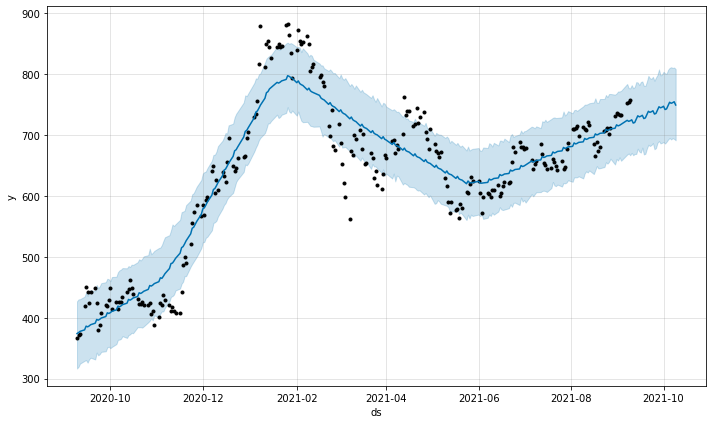

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

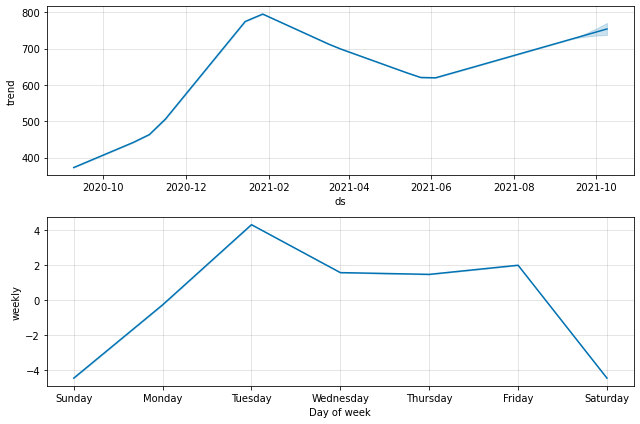

In [ ]:
figure_2 = m.plot_components(forecast) #ploting the trends and components

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>